# Antes de mais nada, vamos à descrição de cada coluna dos dados

date: data de venda
price: preço de venda
bedrooms: número de quartos
bathrooms: número de banheiros
sqft_living: tamanho da área habitacional em pés²
sqft_lot: tamanho do lote em pés²
floors: número de andares
waterfront: ‘1’ se a propriedade for à beira-mar, ‘0’ se não.
view: um índice de 0 a 4 do quão bom é a visão da propriedade (imagine 0 para uma propriedade com visão para um beco sujo e 4 para uma propriedade com visão para um lindo parque)
condition: condição da casa, com valores de 1 até 5
grade: classificação pela qualidade do material da casa. Construções com melhores materiais normalmente custam mais caro
sqft_above: pés² acima do solo
sqft_basement: pés² abaixo do solo
yr_built: ano de construção
yr_renovated: ano de renovação. ‘0’ se nunca foi renovada
zipcode: código zip de 5 dígitos
lat, long: latitude e longitude
squft_livng15: tamanho médio das 15 casas mais próximas, em pés²
sqft_lot15: tamanho médio dos lotes das 15 casas mais próximas, em pés²


Este projeto tem o objetivo de tratar e analizar o dataset kc_house_data.csv, obtido no Kaggle.
Em um primeiro momento iremos verificar a verificar o tipo dos dados e a correlação entre eles.
Posteriormente veificaremos quais os fatores influenciam direta e indiretamento no valor dos imoveis.
Por fim iremos treinar um modelo de machine learn com o objetivo de ajustar os preços dos imóveis para uma futura venda com lucro.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import folium
from folium.plugins import HeatMap

plt.style.use("seaborn-muted")
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


# Obtenção e tratamento dos dados




In [2]:
df_house = pd.read_csv("kc_house_data.csv", sep=",", parse_dates=['date', 'yr_built'])

In [3]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955-01-01,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951-01-01,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933-01-01,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965-01-01,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987-01-01,0,98074,47.61680,-122.04500,1800,7503


In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  datetime64[ns]
 15  yr_renovated   2161

In [5]:
df_house = df_house.assign(year_built=df_house.yr_built.dt.year)
df_house.drop('yr_built', 1, inplace=True)

In [6]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,0,98178,47.51120,-122.25700,1340,5650,1955
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1991,98125,47.72100,-122.31900,1690,7639,1951
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,0,98028,47.73790,-122.23300,2720,8062,1933
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,0,98136,47.52080,-122.39300,1360,5000,1965
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,0,98074,47.61680,-122.04500,1800,7503,1987


In [7]:
pd.DataFrame(df_house['price'].describe())

,price
count,21613.00000
mean,540088.14177
std,367127.19648
min,75000.00000
25%,321950.00000
50%,450000.00000
75%,645000.00000
max,7700000.00000


In [8]:
df_house.isnull().sum().sort_values(ascending=False)

id               0
grade            0
sqft_lot15       0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
year_built       0
dtype: int64

O arquivo de dados é do tipo csv e possui 21 colunas.
As colunas date e yr_built eram do tipo object e foram convertidas para o tipo date.
A coluna yr_built foi recriada conservando somente o ano da construção do imóvel.
Finalizando o tratamento dos dados, foi verificado a quanntidade de campos zerados e também os parametros referente a descrição da coluna preço que é objeto de nosso estudo.

# Análise exploratória dos dados

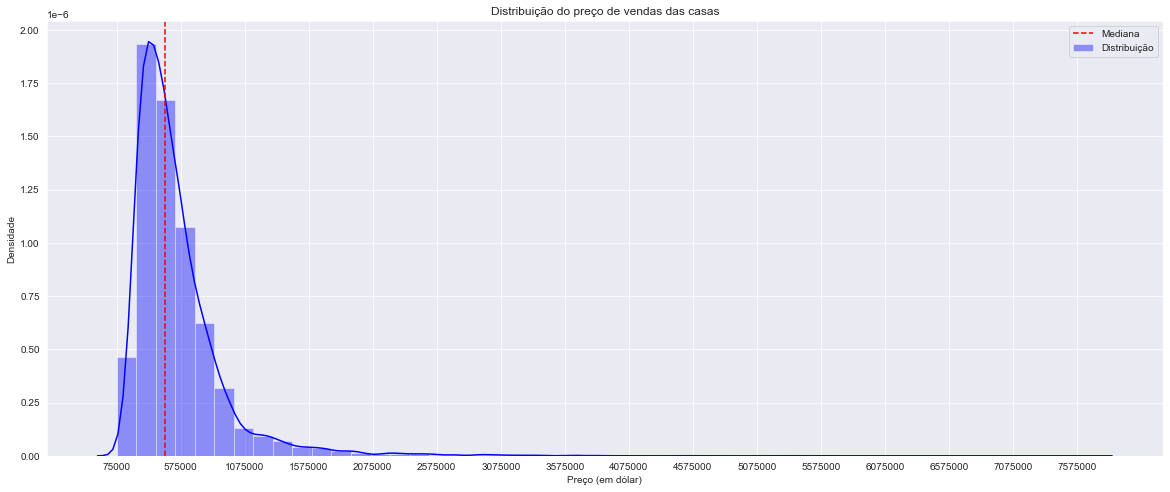

In [9]:
med_price = df_house['price'].median()

plt.figure(figsize=[20, 8])
sns.distplot(df_house['price'], color = 'b', label = 'Distribuição')
plt.axvline(med_price, color='r', linestyle='dashed', label='Mediana')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribuição do preço de vendas das casas')
plt.xlabel('Preço (em dólar)')
plt.ylabel('Densidade')
plt.xticks(np.arange(df_house['price'].min(), df_house['price'].max(), step=500000))

plt.legend()
plt.show()

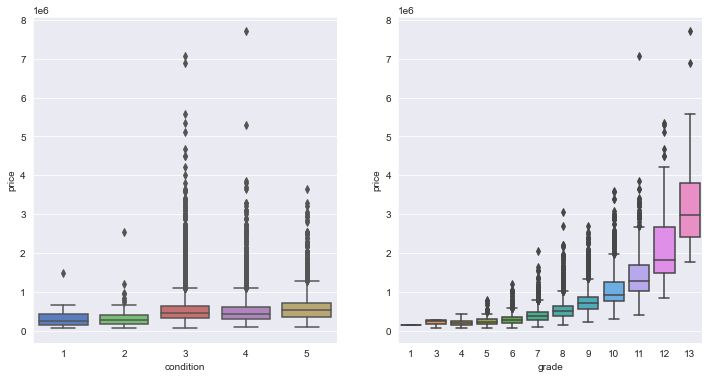

In [10]:
plt.figure(figsize=[12, 6])

plt.subplot(121)
sns.boxplot(x='condition', y='price', data=df_house);

plt.subplot(122)
sns.boxplot(x='grade', y='price', data=df_house)

plt.show()

In [11]:
pd.DataFrame(df_house['condition'].value_counts().sort_index())

,condition
1,30
2,172
3,14031
4,5679
5,1701


In [12]:
pd.DataFrame(df_house['grade'].value_counts().sort_index())

,grade
1,1
3,3
4,29
5,242
6,2038
7,8981
8,6068
9,2615
10,1134
11,399


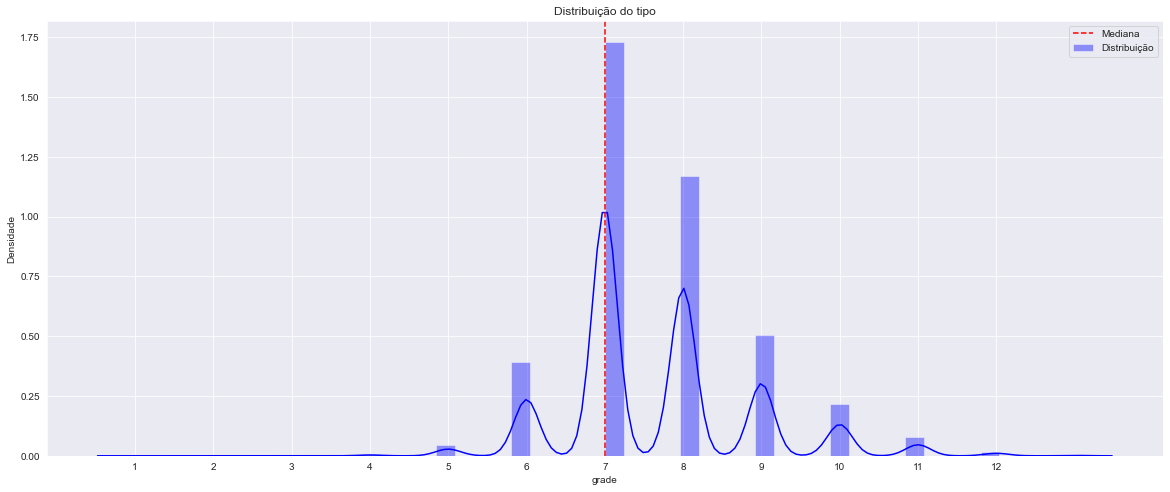

In [13]:
med_grade = df_house['grade'].median()

plt.figure(figsize=[20, 8])
sns.distplot(df_house['grade'], color = 'b', label = 'Distribuição')
plt.axvline(med_grade, color='r', linestyle='dashed', label='Mediana')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribuição do tipo')
plt.xlabel('grade')
plt.ylabel('Densidade')
plt.xticks(np.arange(df_house['grade'].min(), df_house['grade'].max(), step=1))

plt.legend()
plt.show()

In [14]:
var_num = df_house._get_numeric_data()
var_num.drop('id', 1, inplace=True)
var_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
0,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,0,98178,47.51120,-122.25700,1340,5650,1955
1,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1991,98125,47.72100,-122.31900,1690,7639,1951
2,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,0,98028,47.73790,-122.23300,2720,8062,1933
3,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,0,98136,47.52080,-122.39300,1360,5000,1965
4,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,0,98074,47.61680,-122.04500,1800,7503,1987


In [15]:
var_num.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
price,1.00000,0.30835,0.52514,0.70204,0.08966,0.25679,0.26637,0.39729,0.03636,0.66743,0.60557,0.32382,0.12643,-0.05320,0.30700,0.02163,0.58538,0.08245,0.05401
bedrooms,0.30835,1.00000,0.51588,0.57667,0.03170,0.17543,-0.00658,0.07953,0.02847,0.35697,0.47760,0.30309,0.01884,-0.15267,-0.00893,0.12947,0.39164,0.02924,0.15418
bathrooms,0.52514,0.51588,1.00000,0.75467,0.08774,0.50065,0.06374,0.18774,-0.12498,0.66498,0.68534,0.28377,0.05074,-0.20387,0.02457,0.22304,0.56863,0.08718,0.50602
sqft_living,0.70204,0.57667,0.75467,1.00000,0.17283,0.35395,0.10382,0.28461,-0.05875,0.76270,0.87660,0.43504,0.05536,-0.19943,0.05253,0.24022,0.75642,0.18329,0.31805
sqft_lot,0.08966,0.03170,0.08774,0.17283,1.00000,-0.00520,0.02160,0.07471,-0.00896,0.11362,0.18351,0.01529,0.00764,-0.12957,-0.08568,0.22952,0.14461,0.71856,0.05308
floors,0.25679,0.17543,0.50065,0.35395,-0.00520,1.00000,0.02370,0.02944,-0.26377,0.45818,0.52388,-0.24570,0.00634,-0.05912,0.04961,0.12542,0.27989,-0.01127,0.48932
waterfront,0.26637,-0.00658,0.06374,0.10382,0.02160,0.02370,1.00000,0.40186,0.01665,0.08277,0.07207,0.08059,0.09288,0.03028,-0.01427,-0.04191,0.08646,0.03070,-0.02616
view,0.39729,0.07953,0.18774,0.28461,0.07471,0.02944,0.40186,1.00000,0.04599,0.25132,0.16765,0.27695,0.10392,0.08483,0.00616,-0.07840,0.28044,0.07257,-0.05344
condition,0.03636,0.02847,-0.12498,-0.05875,-0.00896,-0.26377,0.01665,0.04599,1.00000,-0.14467,-0.15821,0.17410,-0.06062,0.00303,-0.01494,-0.10650,-0.09282,-0.00341,-0.36142
grade,0.66743,0.35697,0.66498,0.76270,0.11362,0.45818,0.08277,0.25132,-0.14467,1.00000,0.75592,0.16839,0.01441,-0.18486,0.11408,0.19837,0.71320,0.11925,0.44696


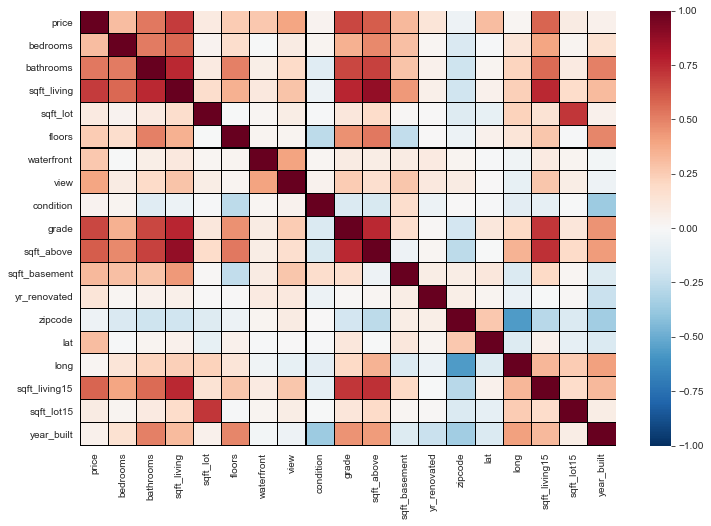

In [16]:
var_num_corr = var_num.corr()

plt.figure(figsize= [12,8])
sns.heatmap(var_num_corr, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r')
plt.show()

In [17]:
var_num_corr['price'].sort_values(ascending=False).round(3)

price            1.00000
sqft_living      0.70200
grade            0.66700
sqft_above       0.60600
sqft_living15    0.58500
bathrooms        0.52500
view             0.39700
sqft_basement    0.32400
bedrooms         0.30800
lat              0.30700
waterfront       0.26600
floors           0.25700
yr_renovated     0.12600
sqft_lot         0.09000
sqft_lot15       0.08200
year_built       0.05400
condition        0.03600
long             0.02200
zipcode         -0.05300
Name: price, dtype: float64

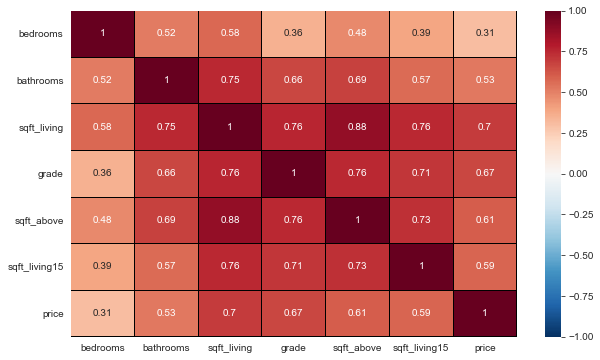

In [18]:
cols = df_house[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'price']]
most_corr_var = cols.corr()

plt.figure(figsize=[10, 6])
sns.heatmap(data=most_corr_var, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r', annot=True)

plt.show()

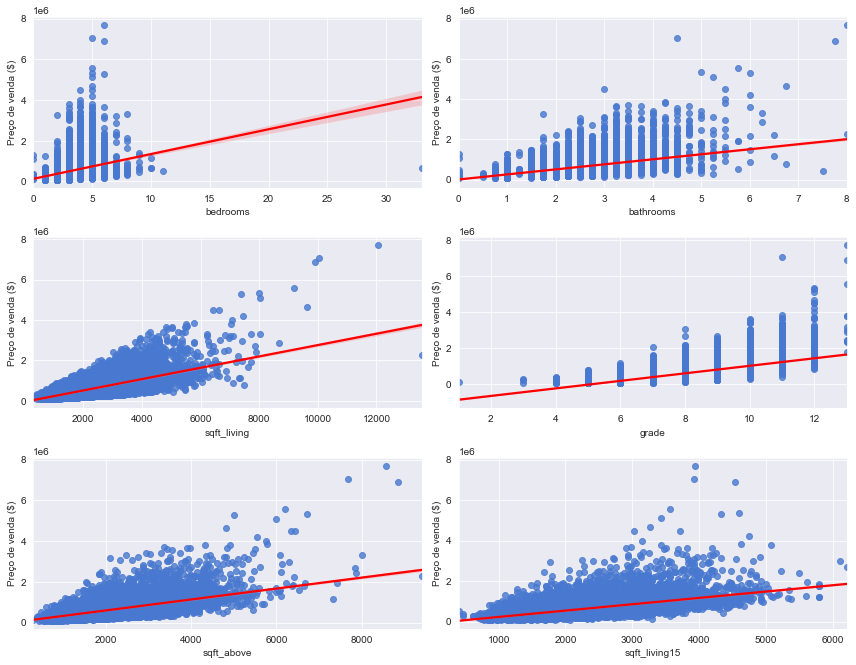

In [19]:
plt.figure(figsize=[12, 12])

i = 1

for col in cols:
    if col == 'price':
        continue
    plt.subplot(4, 2, i)
    sns.regplot(df_house[col], df_house['price'], line_kws={'color': 'r'})
    plt.xlabel(col)
    plt.ylabel('Preço de venda ($)')
    i+=1
    

plt.tight_layout()
plt.show()

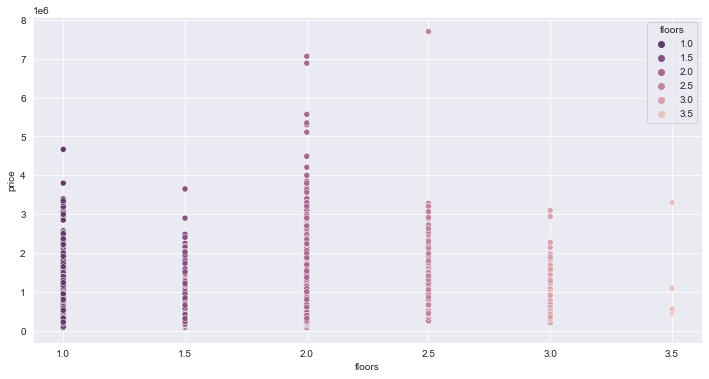

In [20]:
plt.figure(figsize=(12, 6))

cmap = sns.cubehelix_palette(dark=.8, light=.3, as_cmap=True)
sns.scatterplot(df_house['floors'], df_house['price'], hue=df_house['floors'], palette=cmap)

plt.show()

In [21]:
dates = pd.DataFrame(df_house['year_built'], columns=['year_built'])
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2015]
labels = ['1900 - 1910', '1911 - 1920', '1921 - 1930', '1931 - 1940', '1941 - 1950', '1951 - 1960', '1961 - 1970', '1971 - 1980',
         '1981 - 1990', '1991 - 2000', '2001 - 2010', '2011 - 2015']
df_house['decade_built'] = pd.cut(dates['year_built'], bins, labels = labels, include_lowest = True)
df_house.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,decade_built
6271,9550200225,2014-07-11,625000.00000,3,1.50000,1230,3060,1.00000,0,0,3,7,910,320,0,98103,47.66700,-122.33300,1260,4488,1927,1921 - 1930
14724,2310040230,2014-05-20,350000.00000,4,2.25000,2220,6953,2.00000,0,0,4,8,2220,0,0,98038,47.35090,-122.04100,2240,6716,1999,1991 - 2000
3144,114101500,2015-04-17,325000.00000,4,1.75000,1370,9993,1.00000,0,0,3,6,1370,0,0,98028,47.75720,-122.22800,1650,11592,1918,1911 - 1920
3661,4392200165,2014-09-04,440000.00000,1,1.00000,850,6567,1.00000,0,0,4,6,850,0,0,98010,47.32700,-122.03900,2160,9794,1940,1931 - 1940
7972,7338401759,2014-06-10,268000.00000,2,1.00000,1380,5000,1.00000,0,0,3,7,870,510,0,98108,47.53390,-122.29300,1450,5000,1943,1941 - 1950


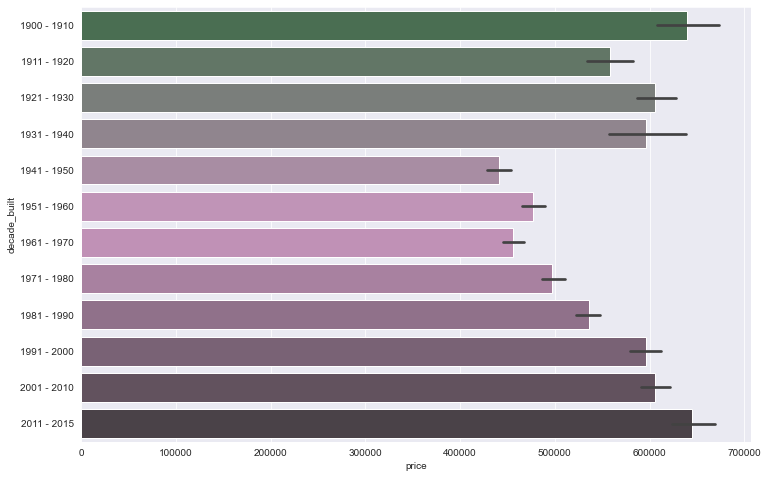

In [22]:
plt.figure(figsize=[12, 8])

sns.barplot(x=df_house['price'], y=df_house['decade_built'], palette="cubehelix_d")

plt.show()

In [23]:
prices = pd.DataFrame(df_house['price'], columns=['price'])
bins = [0, 250000, 500000, 1000000, 8000000]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
df_house['price group'] = pd.cut(prices['price'], bins, labels = labels, include_lowest = True)
df_house.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,decade_built,price group
19898,422000075,2014-07-11,389950.00000,4,2.50000,2240,5500,2.00000,0,0,3,8,2240,0,0,98056,47.49600,-122.16900,700,5500,2013,2011 - 2015,Group 2
9104,622069123,2014-08-19,429000.00000,3,2.00000,1700,52826,1.00000,0,0,3,7,1700,0,0,98058,47.41640,-122.09200,2480,114728,1991,1991 - 2000,Group 2
8044,3423059177,2014-11-26,420000.00000,5,2.75000,2540,27007,1.00000,0,0,3,8,1520,1020,2014,98058,47.43260,-122.15500,1800,26572,1980,1971 - 1980,Group 2
14256,8944310330,2014-08-19,375000.00000,3,2.50000,1520,5649,2.00000,0,0,4,7,1520,0,0,98034,47.72210,-122.16200,1540,5000,1989,1981 - 1990,Group 2
9438,2392100090,2015-04-02,550000.00000,3,1.75000,1570,6500,1.00000,0,0,3,7,920,650,0,98116,47.56500,-122.39800,1570,5750,1948,1941 - 1950,Group 3


In [24]:
df_house.groupby('price group')['price group'].count()


price group
Group 1     2433
Group 2    10127
Group 3     7588
Group 4     1465
Name: price group, dtype: int64

In [25]:
df_house = df_house.assign(renovated=(df_house['yr_renovated'] > 0).astype(int))

In [26]:
reformada = df_house.groupby('renovated')['price'].count()
reformada

renovated
0    20699
1      914
Name: price, dtype: int64

In [27]:
renovated_median = df_house.groupby('renovated')['price'].median()
renovated_median

renovated
0   448000.00000
1   600000.00000
Name: price, dtype: float64

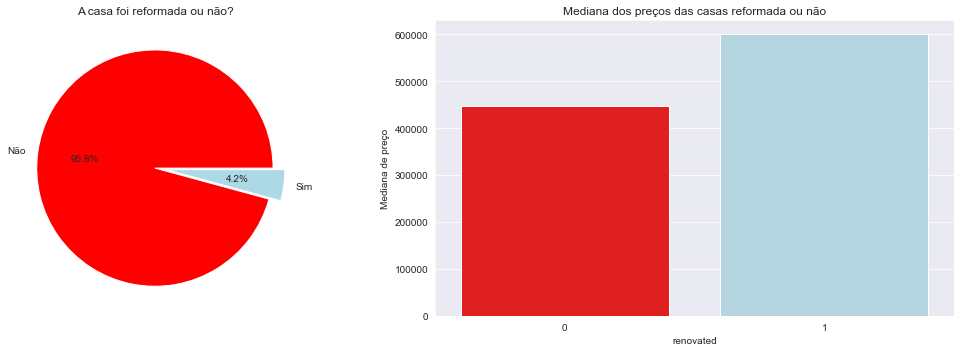

In [28]:
plt.figure(figsize=(15, 5))
        
plt.subplot(1, 2, 1)
plt.pie(reformada, explode = (0, 0.1), colors=['r', 'lightblue'], labels= ['Não', 'Sim'], autopct='%1.1f%%')
plt.title('A casa foi reformada ou não?')

plt.subplot(1, 2, 2)
sns.barplot(x=reformada.index, y = renovated_median, palette=['r', 'lightblue'])
plt.title('Mediana dos preços das casas reformada ou não')
plt.ylabel('Mediana de preço')

plt.tight_layout()
plt.show()